In [6]:
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score

In [7]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns    
%matplotlib inline

# model
# import xgboost as xgb
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE 

# 網格收尋(找模型最佳參數)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [8]:
from sklearn.pipeline import Pipeline

# Normalization  標準化
from sklearn.preprocessing import StandardScaler

### 載入資料

In [9]:
dataset = pd.read_csv("./random_tarin +時間.csv")

dataset.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Current_Ratio,oper_cashflow_liab,current_liab_current_assets,working_capital_assets,Net_Sales_Assets,Receivables_Turnover_Ratio,Inventory_Turnover,Fixed_Assets_Turnover,net_worth_turnover_ratio,...,ratio_invest_assets,ratio_endorsement_equity,adj_laib_equity,ratio_director_shareholder_holding,ratio_majority shareholder,ratio_director_shareholder_Pledge,negative_two_years,crisis,time_q,company
0,0,82.01,0.05,1.22,-0.02,0.20,5.87,11.06,0.32,0.61,...,0.20,0.32,102.82,58387.01,0.0,0.52,0,0,2001Q4,1101
1,1,69.77,0.01,1.43,-0.06,0.25,6.34,11.76,0.39,0.71,...,0.19,0.27,103.41,70659.26,0.0,0.57,0,0,2002Q4,1101
2,2,95.36,0.13,1.05,-0.01,0.31,7.04,16.28,0.48,0.82,...,0.17,0.30,74.31,79575.54,0.0,0.46,0,0,2003Q4,1101
3,3,139.54,0.11,0.72,0.05,0.35,7.43,16.37,0.54,0.86,...,0.15,0.29,67.76,77062.33,0.0,0.46,0,0,2004Q4,1101
4,4,143.47,0.10,0.70,0.06,0.19,8.13,12.18,0.61,0.97,...,0.02,0.28,60.07,78608.66,0.0,0.40,0,0,2005Q2,1101


0    109769
1      1678
Name: crisis, dtype: int64

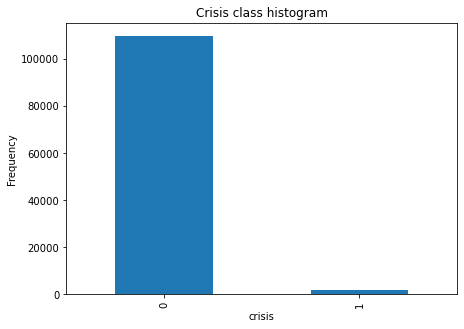

In [10]:
#確認危機/非危機比例
plt.figure(figsize=(7, 5))
pd.value_counts(dataset['crisis']).plot.bar()
plt.title('Crisis class histogram')
plt.xlabel('crisis')
plt.ylabel('Frequency')
dataset['crisis'].value_counts()

In [11]:
# 把公司欄位/ 時間拉出
company = dataset.pop('company')
time_q = dataset.pop('time_q')

In [12]:
# 讀資料,分 X 和 y
dataset = dataset.drop(["Unnamed: 0"],axis=1)

X = dataset.drop("crisis",axis=1)
y = dataset["crisis"]

X.shape,y.shape

((111447, 53), (111447,))

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111447 entries, 0 to 111446
Data columns (total 53 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Current_Ratio                           111447 non-null  float64
 1   oper_cashflow_liab                      111447 non-null  float64
 2   current_liab_current_assets             111447 non-null  float64
 3   working_capital_assets                  111447 non-null  float64
 4   Net_Sales_Assets                        111447 non-null  float64
 5   Receivables_Turnover_Ratio              111447 non-null  float64
 6   Inventory_Turnover                      111447 non-null  float64
 7   Fixed_Assets_Turnover                   111447 non-null  float64
 8   net_worth_turnover_ratio                111447 non-null  float64
 9   INV_AR_Equity                           111447 non-null  float64
 10  l16                                     1114

In [12]:
dataset

,Current_Ratio,oper_cashflow_liab,current_liab_current_assets,working_capital_assets,Net_Sales_Assets,Receivables_Turnover_Ratio,Inventory_Turnover,Fixed_Assets_Turnover,net_worth_turnover_ratio,INV_AR_Equity,...,fin_depen_related_parties,ratio_invest_equity,ratio_invest_assets,ratio_endorsement_equity,adj_laib_equity,ratio_director_shareholder_holding,ratio_majority shareholder,ratio_director_shareholder_Pledge,negative_two_years,crisis
0,82.01,0.05,1.22,-0.02,0.20,5.87,11.06,0.32,0.61,16.60,...,0.04,0.58,0.20,0.32,102.82,58387.01,0.0,0.52,0,0
1,69.77,0.01,1.43,-0.06,0.25,6.34,11.76,0.39,0.71,16.44,...,0.00,0.52,0.19,0.27,103.41,70659.26,0.0,0.57,0,0
2,95.36,0.13,1.05,-0.01,0.31,7.04,16.28,0.48,0.82,14.86,...,0.00,0.44,0.17,0.30,74.31,79575.54,0.0,0.46,0,0
3,139.54,0.11,0.72,0.05,0.35,7.43,16.37,0.54,0.86,16.57,...,0.00,0.37,0.15,0.29,67.76,77062.33,0.0,0.46,0,0
4,143.47,0.10,0.70,0.06,0.19,8.13,12.18,0.61,0.97,19.64,...,0.00,0.05,0.02,0.28,60.07,78608.66,0.0,0.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111442,-9999.00,0.05,-9999.00,-9999.00,0.31,5.25,-9999.00,3.39,1.48,-9999.00,...,0.00,0.10,0.02,-9999.00,-9999.00,-9999.00,-9999.0,-9999.00,0,0
111443,-9999.00,0.00,-9999.00,-9999.00,0.06,4.73,-9999.00,2.76,1.22,-9999.00,...,0.00,0.10,0.02,-9999.00,-9999.00,-9999.00,-9999.0,-9999.00,0,0
111444,-9999.00,0.01,-9999.00,-9999.00,0.13,4.78,-9999.00,2.93,1.29,-9999.00,...,0.00,0.10,0.02,-9999.00,-9999.00,-9999.00,-9999.0,-9999.00,0,0
111445,-9999.00,0.03,-9999.00,-9999.00,0.21,4.98,-9999.00,3.11,1.35,-9999.00,...,0.00,0.10,0.02,-9999.00,-9999.00,-9999.00,-9999.0,-9999.00,0,0


In [94]:
company,time_q

(0          1101
 1          1101
 2          1101
 3          1101
 4          1101
           ...  
 111442    Y9999
 111443    Y9999
 111444    Y9999
 111445    Y9999
 111446    Y9999
 Name: company, Length: 111447, dtype: object,
 0         2001Q4
 1         2002Q4
 2         2003Q4
 3         2004Q4
 4         2005Q2
            ...  
 111442    2019Q4
 111443    2020Q1
 111444    2020Q2
 111445    2020Q3
 111446    2020Q4
 Name: time_q, Length: 111447, dtype: object)

In [95]:
# 類樣本均衡審查
def label_samples_summary(dataset):
    '''
    查看每個類的樣本量分布
    :param df: 數據框
    :return: 無
    '''
    print ('{:*^60}'.format('Labels samples count:'))
    print (dataset.iloc[:, 1].groupby(dataset.iloc[:, -1]).count()) # df.iloc[:,-1].value_counts()
    
label_samples_summary(dataset)

*******************Labels samples count:********************
crisis
0    109769
1      1678
Name: oper_cashflow_liab, dtype: int64


In [96]:
# 切分資料
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (89157, 53)
Number transactions y_train dataset:  (89157,)
Number transactions X_test dataset:  (22290, 53)
Number transactions y_test dataset:  (22290,)


In [97]:
# 樣本均衡處理 (處理訓練樣品不平衡問題，丟到模型)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1324
Before OverSampling, counts of label '0': 87833 

After OverSampling, the shape of train_X: (175666, 53)
After OverSampling, the shape of train_y: (175666,) 

After OverSampling, counts of label '1': 87833
After OverSampling, counts of label '0': 87833


---

# 建模從此開始 (NOstd)

### Random Forest

In [17]:
#網格搜尋 (給用區間，搜尋最佳參數)
rf = RandomForestClassifier()
# 模型參數dict
param_rf = [{'n_estimators': range(10,200,10),
               'max_features': range(3,11,2),
               'max_depth':range(2,15,1),
               'min_samples_split':range(50,201,20),
               'class_weight':["balanced"]
              }]
 

# grid_rf = GridSearchCV(rf,param_rf,scoring="roc_auc", cv=5 , n_jobs=-1)
grid_rf = RandomizedSearchCV(rf,param_rf,scoring='roc_auc', cv=5 , n_jobs=-1)


In [19]:
#用 balanced 過的訓練資料去訓練模型
grid_rf.fit(X_train_res,y_train_res.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions=[{'class_weight': ['balanced'],
                                         'max_depth': range(2, 15),
                                         'max_features': range(3, 11, 2),
                                         'min_samples_split': range(50, 201, 20),
                                         'n_estimators': range(10, 200, 10)}],
                   scoring='roc_auc')

In [20]:
#save best model
best_rf = grid_rf.best_estimator_

#check best n_estimators value
print(grid_rf.best_params_)

{'n_estimators': 70, 'min_samples_split': 110, 'max_features': 7, 'max_depth': 13, 'class_weight': 'balanced'}


In [311]:
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=13, max_features=7,
                       min_samples_split=110, n_estimators=70)

In [310]:
# #原始資料評分
# print('RandomForest_score_train : {}'.format(best_rf.score(X_train_res,y_train_res)))
# print('RandomForest_score_test : {}'.format(best_rf.score(X_test, y_test)))

RandomForest_score_train : 0.9522250308623832
RandomForest_score_test : 0.9289716164282076


---
## 網格搜尋後比較test/train,再手動調參

### 網格搜尋MODEL

In [27]:
#用網格搜尋出來的模型fit
best_rf.fit(X_train_res,y_train_res.ravel())

NameError: name 'best_rf' is not defined

In [421]:
#最佳參數 的 test 
y_pred_bs = best_rf.predict(X_test)

#y_pred  test ROC_AUC score
from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score

roc_auc_score = roc_auc_score(y_test, y_pred_bs)
print('roc_auc_score_test_BestModel: {}'.format(roc_auc_score))

roc_auc_score_test_BestModel: 0.7520384623858571


In [422]:
## #最佳參數 的 train ROC_AUC score

from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score
y_pred_bs_tr = best_rf.predict(X_train)
roc_auc_score_tr = roc_auc_score(y_train, y_pred_bs_tr)
print('roc_auc_score_train_BestModel: {}'.format(roc_auc_score_tr))

roc_auc_score_train_BestModel: 0.8739192119637127


### 手動調參MODEL

In [99]:
# 手動調參
rf_test1=RandomForestClassifier( max_depth=6, max_features=10,
                       min_samples_split=110, n_estimators=150, n_jobs=-1)

rf_test1.fit(X_train_res,y_train_res.ravel())

RandomForestClassifier(max_depth=6, max_features=10, min_samples_split=110,
                       n_estimators=150, n_jobs=-1)

In [100]:
#手動調參 的 test 
y_pred = rf_test1.predict(X_test)

#y_pred  test ROC_AUC score
from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score

roc_auc_score = roc_auc_score(y_test, y_pred)
print('roc_auc_score_test: {}'.format(roc_auc_score))

roc_auc_score_test: 0.7323944695817726


In [101]:
##手動調參 的 train ROC_AUC score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score
y_pred_tr = rf_test1.predict(X_train)
roc_auc_score_tr = roc_auc_score(y_train, y_pred_tr)
print('roc_auc_score_train: {}'.format(roc_auc_score_tr))

roc_auc_score_train: 0.7620228074267416


In [102]:
## crisis predict

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score
y_pd = rf_test1.predict(X)
roc_auc_score_all = roc_auc_score(y, y_pd)
print('roc_auc_score_ALL: {}'.format(roc_auc_score_all))

roc_auc_score_ALL: 0.7557798182988915


In [103]:
y_pd = pd.DataFrame(y_pd)

In [104]:
pd.DataFrame(y_pd).value_counts()

0    93878
1    17569
dtype: int64

In [105]:
# 公司 日期 加危機與否 (0/1)
crisis_predict = pd.concat([company,time_q,y_pd],axis =1)
pd.DataFrame(crisis_predict)
crisis_predict.to_csv('crisis_company_predict.csv')

In [106]:
# 公司 日期 加危機 = 1

badcompany_rf=crisis_predict[crisis_predict[0]==1]
badcompany_rf.to_csv('badcompany_rf.csv')

In [107]:
dataset["crisis"].value_counts()

0    109769
1      1678
Name: crisis, dtype: int64

In [108]:
crisis_predict[0].value_counts()

0    93878
1    17569
Name: 0, dtype: int64

In [109]:
print(classification_report(dataset["crisis"],crisis_predict[0]))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92    109769
           1       0.06      0.66      0.12      1678

    accuracy                           0.85    111447
   macro avg       0.53      0.76      0.52    111447
weighted avg       0.98      0.85      0.90    111447



In [110]:
badcompany_rf

,company,time_q,0
45,1101,2016Q4,1
89,1103,2012Q2,1
90,1103,2012Q3,1
91,1103,2012Q4,1
92,1103,2013Q1,1
...,...,...,...
110735,OTC27,2013Q2,1
110763,OTC27,2020Q2,1
110766,OTC29,2001Q4,1
110870,OTC34,2018Q2,1


In [111]:
num_correct_samples = accuracy_score(y_test, y_pred , normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)


print('number of correct sample: {}'.format(num_correct_samples))
print('con_matrix:{}'.format(con_matrix))

number of correct sample: 18841
con_matrix:[[18623  3313]
 [  136   218]]


---

## 選用手動調參過後的模型,再進行重要特徵分數的排行

In [347]:
#重要特徵分數
imp_rf=rf_test1.feature_importances_
imp_rf

array([0.00258086, 0.00204756, 0.01951145, 0.00555747, 0.00122349,
       0.00340533, 0.00434298, 0.00200515, 0.00169686, 0.00184479,
       0.00115032, 0.024056  , 0.00248158, 0.00301354, 0.00238498,
       0.00219759, 0.00365723, 0.00535949, 0.01139099, 0.00205421,
       0.00291606, 0.0561404 , 0.08939852, 0.00243384, 0.01004022,
       0.03770819, 0.00170012, 0.02545457, 0.03332692, 0.01674879,
       0.03237076, 0.15294444, 0.0862594 , 0.01937882, 0.02141766,
       0.00186099, 0.03551881, 0.00126819, 0.04011603, 0.01879479,
       0.00250384, 0.0110734 , 0.03290336, 0.01383434, 0.01337963,
       0.00652044, 0.00813684, 0.00373842, 0.00733932, 0.00343079,
       0.00148738, 0.00312948, 0.10476335])

In [348]:
names=X.columns
names

Index(['Current_Ratio', 'oper_cashflow_liab', 'current_liab_current_assets',
       'working_capital_assets', 'Net_Sales_Assets',
       'Receivables_Turnover_Ratio', 'Inventory_Turnover',
       'Fixed_Assets_Turnover', 'net_worth_turnover_ratio', 'INV_AR_Equity',
       'l16', 'l17', 'l18', 'Rate_of_RD_expenses', 'Revenue_Growth_Rate',
       'Operating_gross_profit_growth_rate',
       'Net_profit_growth_rate_before_tax', 'l10', 'l11', 'Gross_margin',
       'realized_gross_profit_on_sales', 'Operating_margin',
       'earning_before_tax_margin', 'Operating_Expense_Ratio',
       'Total_Non_Op_Income_Exp', 'Net_Asset_Value_per_Share_F', 'l2', 'l3',
       'l4', 'Return_on_Operating_Assets', 'net_income_change_rate',
       'Retained_earnings_assets', 'Income_Before_Tax_and_Interests_assets',
       'debt_ratio', 'Interest_Coverage_Ratio', 'Cash_flow_ratio',
       'ration_of_interest_expense', 'l1', 'Debt_Equity_Ratio',
       'Equity_Asset_Ratio', 'Ratio_of_liab_to_assets', 'Debt_E

In [349]:
imp_rf,names

(array([0.00258086, 0.00204756, 0.01951145, 0.00555747, 0.00122349,
        0.00340533, 0.00434298, 0.00200515, 0.00169686, 0.00184479,
        0.00115032, 0.024056  , 0.00248158, 0.00301354, 0.00238498,
        0.00219759, 0.00365723, 0.00535949, 0.01139099, 0.00205421,
        0.00291606, 0.0561404 , 0.08939852, 0.00243384, 0.01004022,
        0.03770819, 0.00170012, 0.02545457, 0.03332692, 0.01674879,
        0.03237076, 0.15294444, 0.0862594 , 0.01937882, 0.02141766,
        0.00186099, 0.03551881, 0.00126819, 0.04011603, 0.01879479,
        0.00250384, 0.0110734 , 0.03290336, 0.01383434, 0.01337963,
        0.00652044, 0.00813684, 0.00373842, 0.00733932, 0.00343079,
        0.00148738, 0.00312948, 0.10476335]),
 Index(['Current_Ratio', 'oper_cashflow_liab', 'current_liab_current_assets',
        'working_capital_assets', 'Net_Sales_Assets',
        'Receivables_Turnover_Ratio', 'Inventory_Turnover',
        'Fixed_Assets_Turnover', 'net_worth_turnover_ratio', 'INV_AR_Equity',
    

In [350]:
#把欄位名稱跟特徵分數結合(排序)
zip(imp_rf,names)
imp_rf,names=zip(*sorted(zip(imp_rf,names),reverse = True))
imp_rf,names

#特徵分數印出
for i in range(X.shape[1]):
    print("%2d) %-*s %f" % (i+1,40,names[i],imp_rf[i]))

 1) Retained_earnings_assets                 0.152944
 2) negative_two_years                       0.104763
 3) earning_before_tax_margin                0.089399
 4) Income_Before_Tax_and_Interests_assets   0.086259
 5) Operating_margin                         0.056140
 6) Debt_Equity_Ratio                        0.040116
 7) Net_Asset_Value_per_Share_F              0.037708
 8) ration_of_interest_expense               0.035519
 9) l4                                       0.033327
10) i69                                      0.032903
11) net_income_change_rate                   0.032371
12) l3                                       0.025455
13) l17                                      0.024056
14) Interest_Coverage_Ratio                  0.021418
15) current_liab_current_assets              0.019511
16) debt_ratio                               0.019379
17) Equity_Asset_Ratio                       0.018795
18) Return_on_Operating_Assets               0.016749
19) i71                     

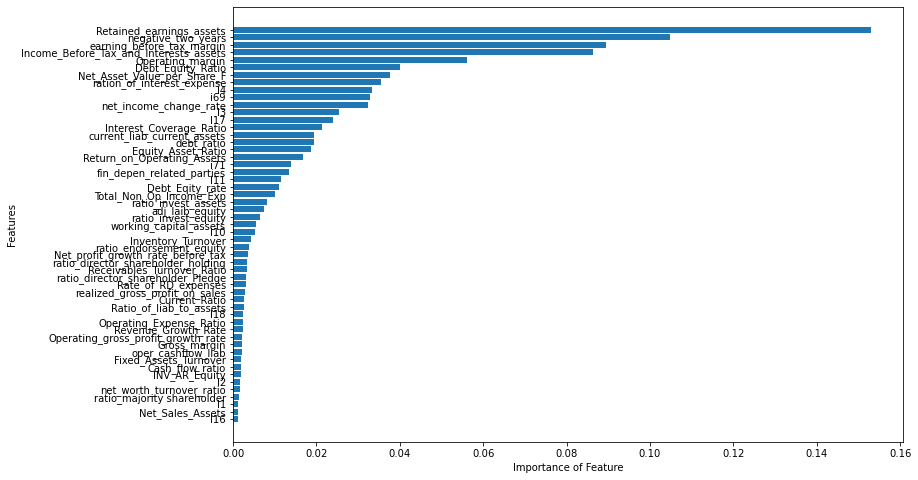

In [357]:
#把欄位名稱跟特徵分數結合(排序)
zip(imp_rf,names)
imp_rf,names=zip(*sorted(zip(imp_rf,names)))

#畫圖
plt.figure(figsize=(12,8))
plt.barh(names,imp_rf)
plt.xlabel('Importance of Feature')
plt.ylabel('Features')
plt.show()

In [416]:
#  挑選 X 數量 
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf_test1,threshold=0.025,prefit=True)
X_selected = sfm.transform(X_train)
print(X_selected.shape[1])

12


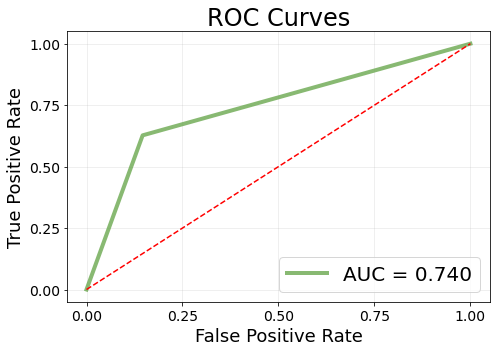

In [383]:
#畫出ROC指標, 驗證模型好壞
from sklearn.metrics import roc_curve, auc

# get 0/1 binary lable for each patient encounter
label = y_test

# get the last prediction in [0,1] for the patient
prediction = y_pred

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

# plot rocs & display AUCs
plt.figure(figsize=(7, 5))
line_kwargs = {'linewidth': 4, 'alpha': 0.8}
plt.plot(rnn_roc[0], rnn_roc[1], label="AUC = %0.3f" % rnn_auc, color='#6AA84F', **line_kwargs)
plt.legend(loc='lower right', fontsize=20)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.title("ROC Curves", fontsize=24)
plt.grid(alpha=0.25)
plt.tight_layout()

---
## Learning Curve

In [375]:
print(best_rf)
print(rf_test1)

RandomForestClassifier(class_weight='balanced', max_depth=13, max_features=7,
                       min_samples_split=110, n_estimators=70)
RandomForestClassifier(max_depth=6, max_features=7, min_samples_split=110,
                       n_estimators=150, n_jobs=-1)


In [88]:
sm = SMOTE(random_state=2)
X_all, y_all = sm.fit_resample(X, y.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_all==1)))
print("Affter OverSampling, counts of label '0': {} \n".format(sum(y_all==0)))

After OverSampling, counts of label '1': 106306
Affter OverSampling, counts of label '0': 106306 



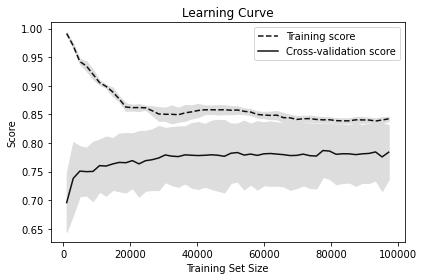

In [359]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_test1, 
                                                        X=X, 
                                                        y=y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='roc_auc',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Score"), plt.legend(loc="best")
plt.tight_layout()
plt.savefig('./testmodel_learningcurve.png')
plt.show()

---

model建置 ->針對imbalenced data 不能使用 accuracy 當作評分標準

類別資料(onehot)太多會影響隨機森林的效能